In [1]:
%env ROS_IP=192.168.0.17
%env ROS_MASTER_URI=http://192.168.0.17:11311

!echo $ROS_IP
!echo $ROS_MASTER_URI

env: ROS_IP=192.168.0.17
env: ROS_MASTER_URI=http://192.168.0.17:11311
192.168.0.17
http://192.168.0.17:11311


In [2]:
from visioncraft.locobot.camera import LocobotCamera
from visioncraft.locobot.arm_control import LocobotArmControl

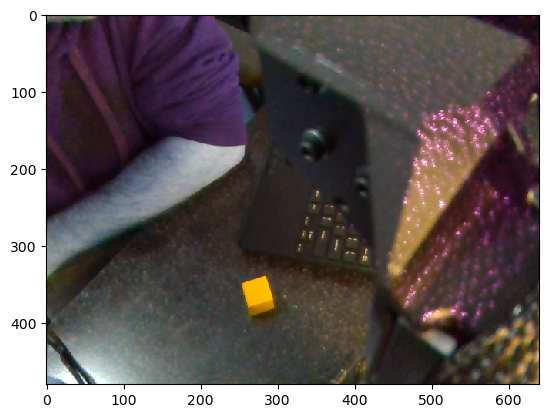

In [3]:
cam = LocobotCamera(depth_topic="/locobot/camera/depth/image_rect_raw")

img = cam.get_image()
import matplotlib.pyplot as plt
plt.imshow(img)
plt.show()

In [4]:
print(cam.get_points())

None


In [4]:
arm_control = LocobotArmControl(use_simulation=False)
# cam = LocobotCamera()
# arm_control.move_arm([0.0, 0.0, 0.0, 0.0, 0.0, 0.0])




[INFO] [1745949103.346942]: Waiting for joint trajectory action on /locobot/arm_controller/follow_joint_trajectory…


[INFO] [1745949103.629521]: Joint‐space action server ready
[ INFO] [1745949103.681377480]: Loading robot model 'locobot'...
[ INFO] [1745949103.681410448]: No root/virtual joint specified in SRDF. Assuming fixed joint
[ INFO] [1745949106.250057457]: Ready to take commands for planning group interbotix_arm.


[ WARN] [1745949103.678610137]: Link 'locobot/caster_back_link' is not known to URDF. Cannot disable/enable collisons.
[ WARN] [1745949103.680448678]: Link 'locobot/caster_front_link' is not known to URDF. Cannot disable/enable collisons.
[ WARN] [1745949103.680489345]: Link 'locobot/wheel_left_link' is not known to URDF. Cannot disable/enable collisons.
[ WARN] [1745949103.680505032]: Link 'locobot/wheel_right_link' is not known to URDF. Cannot disable/enable collisons.
[ WARN] [1745949103.680524006]: Link 'locobot/caster_back_link' is not known to URDF. Cannot disable/enable collisons.
[ WARN] [1745949103.680537795]: Link 'locobot/caster_front_link' is not known to URDF. Cannot disable/enable collisons.
[ WARN] [1745949103.680557215]: Link 'locobot/wheel_left_link' is not known to URDF. Cannot disable/enable collisons.
[ WARN] [1745949103.680571325]: Link 'locobot/wheel_right_link' is not known to URDF. Cannot disable/enable collisons.
[ WARN] [1745949103.680587716]: Link 'locobot/ca

[INFO] [1745949106.760784]: LocobotArmControl initialized


In [10]:
# arm_control.move_gripper(1)

# import time
# time.sleep(0.5)
arm_control.close_gripper()

[WARN] [1745949132.198685]: ❌ No object detected before fully closed


In [11]:
arm_control.open_gripper()

In [6]:
arm_control.move_gripper(1)


False

In [7]:
arm_control.joint_states.position[6]

-0.00920388475060463

In [8]:
arm_control.open_gripper()

In [14]:
print(arm_control.joint_states)

header: 
  seq: 138643
  stamp: 
    secs: 1745946656
    nsecs: 243969147
  frame_id: ''
name: 
  - waist
  - shoulder
  - elbow
  - forearm_roll
  - wrist_angle
  - wrist_rotate
  - gripper
  - pan
  - tilt
  - left_finger
  - right_finger
position: [0.0076699042692780495, 0.18867963552474976, 0.3405437469482422, -0.006135923322290182, 1.0246992111206055, 0.04295146465301514, 0.06289321184158325, -0.013805827125906944, 0.954136073589325, 0.020393362268805504, -0.020393362268805504]
velocity: [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
effort: [-13.450000762939453, -242.10000610351562, -158.7100067138672, 0.0, 0.0, 0.0, -123.74000549316406, -16.139999389648438, 0.0, 0.0, 0.0]


In [13]:
from trajectory_msgs.msg import JointTrajectory, JointTrajectoryPoint
import rospy

width = 1.0
duration = 2.0

width = max(0.0, min(0.1, width))
pos = width / 2.0
traj = JointTrajectory()
traj.joint_names = ['left_finger']

pt = JointTrajectoryPoint()
pt.positions = [pos]
pt.time_from_start = rospy.Duration(duration)
traj.points = [pt]
traj.header.stamp = rospy.Time.now()

gripper_pub = rospy.Publisher(
            "/locobot/gripper_controller/command",
            JointTrajectory,
            queue_size=1
        )


gripper_pub.publish(traj)
rospy.sleep(duration + 0.2)

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from visioncraft.locobot.camera import LocobotCamera
from visioncraft.locobot.arm_control import LocobotArmControl
from geometry_msgs.msg import Pose
from tf.transformations import quaternion_from_euler

# Create target poses
target_pose = Pose()
target_pose.position.x = 0.3
target_pose.position.y = -0.3
target_pose.position.z = 0.2

# Create a quaternion for (roll=0, pitch=-90°, yaw=0)
q = quaternion_from_euler(0, np.pi/2, 0)
target_pose.orientation.x = q[0]
target_pose.orientation.y = q[1]
target_pose.orientation.z = q[2]
target_pose.orientation.w = q[3]


# Execute the grab sequence
# arm_control.move_gripper(0.1)  # Open gripper
arm_control.go_to_pose(target_pose)  # Move to approach position


True

In [4]:
arm_control.move_gripper(1.0)

header: 
  seq: 200073
  stamp: 
    secs: 1745859426
    nsecs: 208255767
  frame_id: ''
name: 
  - left_wheel_joint
  - right_wheel_joint
  - waist
  - shoulder
  - elbow
  - forearm_roll
  - wrist_angle
  - wrist_rotate
  - gripper
  - left_finger
  - right_finger
  - pan
  - tilt
position: [0.0, 0.0, -0.9602720141410828, 0.36968937516212463, 0.04448544234037399, -0.003067961661145091, 1.2072429656982422, -0.9664078950881958, 0.016873789951205254, 0.019731242209672928, -0.019731242209672928, -0.013805827125906944, 0.17794176936149597]
velocity: [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -0.0, 0.0, 0.0]
effort: [0.0, 0.0, -88.77000427246094, -349.70001220703125, -312.0400085449219, 5.380000114440918, 0.0, 0.0, -169.47000122070312, 0.0, 0.0, 0.0, 0.0]
0.0
header: 
  seq: 200076
  stamp: 
    secs: 1745859426
    nsecs: 238274812
  frame_id: ''
name: 
  - left_wheel_joint
  - right_wheel_joint
  - waist
  - shoulder
  - elbow
  - forearm_roll
  - wrist_angle
  - wrist_rotate
  

In [6]:
arm_control.move_gripper(0.5)

header: 
  seq: 204993
  stamp: 
    secs: 1745859475
    nsecs: 408286571
  frame_id: ''
name: 
  - left_wheel_joint
  - right_wheel_joint
  - waist
  - shoulder
  - elbow
  - forearm_roll
  - wrist_angle
  - wrist_rotate
  - gripper
  - left_finger
  - right_finger
  - pan
  - tilt
position: [0.0, 0.0, -0.9602720141410828, 0.36968937516212463, 0.04448544234037399, -0.003067961661145091, 1.2072429656982422, -0.9664078950881958, 0.015339808538556099, 0.019709520041942596, -0.019709520041942596, -0.013805827125906944, 0.17794176936149597]
velocity: [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -0.0, 0.0, 0.0]
effort: [0.0, 0.0, -86.08000183105469, -349.70001220703125, -312.0400085449219, 0.0, 0.0, 0.0, -153.3300018310547, 0.0, 0.0, 0.0, 0.0]
0.0
header: 
  seq: 204996
  stamp: 
    secs: 1745859475
    nsecs: 438275337
  frame_id: ''
name: 
  - left_wheel_joint
  - right_wheel_joint
  - waist
  - shoulder
  - elbow
  - forearm_roll
  - wrist_angle
  - wrist_rotate
  - gripper
  - l

In [12]:
cam = LocobotCamera()

In [ ]:
image = cam.get_image()
# print(image)

In [9]:
cam.tilt(1)

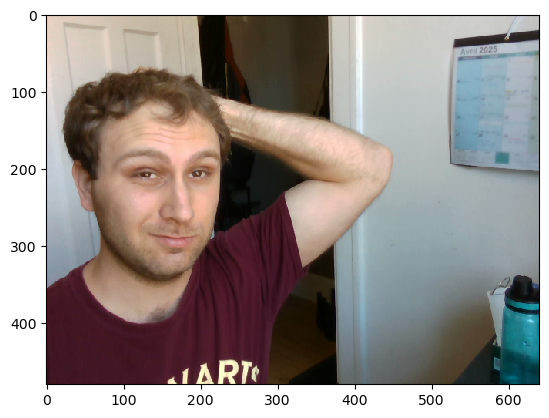

In [18]:

import matplotlib.pyplot as plt

image = cam.get_image()
# convert bgr to rgb
image = image[:, :, ::-1]
plt.imshow(image)
plt.show()